In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [2]:
df = pd.read_csv("ABAdRecall.csv")

In [3]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [5]:
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [6]:
df.describe(include = 'O')

,auction_id,experiment,date,device_make,browser
count,8077,8077,8077,8077,8077
unique,8077,2,8,270,15
top,8986511c-43d5-4f8e-a8f6-da12dfb0c2e4,control,2020-07-03,Generic Smartphone,Chrome Mobile
freq,1,4071,2015,4743,4554


In [7]:
df.experiment.value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [8]:
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [9]:
df.yes.value_counts()

0    7505
1     572
Name: yes, dtype: int64

In [10]:
df.no.value_counts()

0    7406
1     671
Name: no, dtype: int64

In [11]:
df['engaged'] = df.yes + df.no ; df.engaged.value_counts()

0    6834
1    1243
Name: engaged, dtype: int64

In [12]:
#calc ctr
df[df.experiment == 'control']['engaged'].sum() , df[df.experiment == 'exposed']['engaged'].sum()

(586, 657)

In [13]:
df.device_make.value_counts()

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
                      ... 
NEM-L51                  1
5099Y                    1
EML-L29                  1
Samsung SM-A505F         1
HTC M10h                 1
Name: device_make, Length: 270, dtype: int64

In [14]:
df['platform_os'].value_counts()

6    7648
5     428
7       1
Name: platform_os, dtype: int64

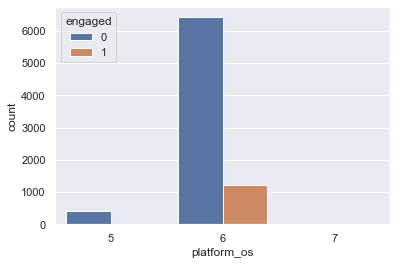

In [15]:
sns.countplot(df.platform_os, hue = df.engaged);

In [16]:
pd.crosstab(df.hour, df.engaged, normalize = 'index' )

engaged,0,1
hour,,
0,0.840206,0.159794
1,0.855856,0.144144
2,0.856522,0.143478
3,0.834586,0.165414
4,0.836299,0.163701
5,0.837748,0.162252
6,0.847095,0.152905
7,0.845144,0.154856
8,0.829949,0.170051


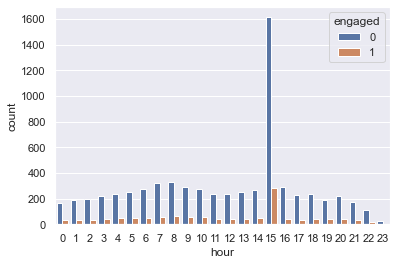

In [17]:
sns.countplot(df.hour, hue = df.engaged);

Invariant metrics

In [18]:
def compare_metrics(cols, df = df, experiment = None):
    if experiment:
        print(f'metrics for {experiment} group')
        df[df.experiment == experiment][cols].value_counts(normalize = True)
    else:
        print(f'metrics for control group')
        print('-------------------------')
        ex1 = df[df.experiment == 'control'][cols].value_counts(normalize = True)
        print(ex1)
        print(f'\nmetrics for exposed group')
        print('-------------------------')
        ex2 = df[df.experiment == 'exposed'][cols].value_counts(normalize = True)
        print(ex2)

In [19]:
compare_metrics('platform_os')

metrics for control group
-------------------------
6    0.924343
5    0.075657
Name: platform_os, dtype: float64

metrics for exposed group
-------------------------
6    0.969795
5    0.029955
7    0.000250
Name: platform_os, dtype: float64


In [20]:
compare_metrics('browser')

metrics for control group
-------------------------
Chrome Mobile                 0.591992
Facebook                      0.137804
Samsung Internet              0.120855
Chrome Mobile WebView         0.071727
Mobile Safari                 0.060427
Chrome Mobile iOS             0.008352
Mobile Safari UI/WKWebView    0.007369
Pinterest                     0.000491
Chrome                        0.000246
Opera Mini                    0.000246
Android                       0.000246
Puffin                        0.000246
Name: browser, dtype: float64

metrics for exposed group
-------------------------
Chrome Mobile                 0.535197
Chrome Mobile WebView         0.298802
Samsung Internet              0.082876
Facebook                      0.050674
Mobile Safari                 0.022716
Chrome Mobile iOS             0.004244
Mobile Safari UI/WKWebView    0.003495
Opera Mobile                  0.000749
Chrome                        0.000499
Firefox Mobile                0.000250
Edge Mo

In [21]:
compare_metrics('device_make')

metrics for control group
-------------------------
Generic Smartphone    0.592238
iPhone                0.076394
Samsung SM-G960F      0.025547
Samsung SM-G973F      0.023581
Samsung SM-G950F      0.016212
                        ...   
Samsung SM-A908B      0.000246
Samsung SM-G903F      0.000246
Samsung SM-G930T      0.000246
K7                    0.000246
Samsung SM-J701F      0.000246
Name: device_make, Length: 169, dtype: float64

metrics for exposed group
-------------------------
Generic Smartphone         0.582127
iPhone                     0.030454
Samsung SM-G960F           0.024713
Samsung SM-G950F           0.020469
Samsung SM-G973F           0.014478
                             ...   
XiaoMi Redmi 6             0.000250
EVA-L09                    0.000250
Samsung SM-A207F           0.000250
XiaoMi Redmi Note 6 Pro    0.000250
HTC M10h                   0.000250
Name: device_make, Length: 218, dtype: float64


In [22]:
compare_metrics('yes')

metrics for control group
-------------------------
0    0.935151
1    0.064849
Name: yes, dtype: float64

metrics for exposed group
-------------------------
0    0.923115
1    0.076885
Name: yes, dtype: float64


In [23]:
compare_metrics('no')

metrics for control group
-------------------------
0    0.920904
1    0.079096
Name: no, dtype: float64

metrics for exposed group
-------------------------
0    0.912881
1    0.087119
Name: no, dtype: float64


In [24]:
compare_metrics('engaged')

metrics for control group
-------------------------
0    0.856055
1    0.143945
Name: engaged, dtype: float64

metrics for exposed group
-------------------------
0    0.835996
1    0.164004
Name: engaged, dtype: float64


In [25]:
df[df.experiment == 'control']['platform_os'].value_counts(normalize = True).reset_index()

,index,platform_os
0,6,0.924343
1,5,0.075657


In [34]:
df[(df.experiment == 'control') & (df.engaged == 1)]['yes'].value_counts()

0    322
1    264
Name: yes, dtype: int64

In [35]:
df[(df.experiment == 'exposed')& (df.engaged == 1)]['yes'].value_counts()

0    349
1    308
Name: yes, dtype: int64

In [48]:
df.experiment.value_counts(normalize= True)

control    0.504024
exposed    0.495976
Name: experiment, dtype: float64

In [49]:
0.26+0.28

0.54

In [44]:
349+308

657

In [27]:
#Classical AB test using Z-test

> The task is to determine whether a recent advertising campaign resulted in a significant lift in brand awareness.
Hypothesis:

H0: There is a significant lift in awareness due to the recent campaign

H1: There is no significant lift in awareness (not H0)

we'll consider only customers with engagement(i.e answered the question in the questionnaire)

In [60]:
engaged = df[df.engaged == 1].reset_index(drop = True)

We'll Use the yes column - where 1 signifies that the user answered yes and 0 signifies that the user answered no

In [29]:
engaged.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,engaged
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,1
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,1
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,1


In [30]:
control_group = engaged[engaged.experiment == 'control']['yes']
exposed_group = engaged[engaged.experiment == 'exposed']['yes']

In [31]:
control_group.value_counts(normalize = True)

0    0.549488
1    0.450512
Name: yes, dtype: float64

In [32]:
exposed_group.value_counts(normalize = True)

0    0.531202
1    0.468798
Name: yes, dtype: float64

In [35]:
control_group.mean(), exposed_group.mean(), control_group.shape[0], exposed_group.shape[0]

(0.45051194539249145, 0.4687975646879756, 586, 657)

In [36]:
control_group.std(), exposed_group.std()

(0.49796997543854177, 0.49940566822721727)

In [37]:
sm.stats.ztest(control_group, exposed_group, alternative= 'larger')

(-0.6452687398426953, 0.7406234765948244)

since the p value (0.74) is greater than the alpha (at 0.05) we thereby do not reject the null hypothesis and conclude that there is no significant lift in brand awareness even after the campaign.

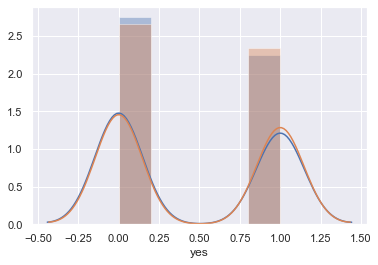

In [38]:
sns.distplot(control_group)
sns.distplot(exposed_group);

# Machine learning

In [39]:
df.device_make.value_counts()[-20:]

CUBOT_X18_Plus      1
XiaoMi Redmi 8      1
Samsung SM-A908B    1
Samsung SM-G955U    1
Swift 2 Plus        1
Samsung SM-N976V    1
VFD 710             1
5099Y               1
Samsung SM-A415F    1
X13                 1
Samsung SM-G9730    1
Samsung SM-A605F    1
Samsung SM-N920I    1
CPH1851             1
FRD-L09             1
Lenovo P2a42        1
VKY-L09             1
Samsung SM-G925I    1
Samsung SM-G930L    1
moto e5 plus        1
Name: device_make, dtype: int64

In [40]:
df.device_make[df.device_make.str.contains('Samsung') | df.device_make.str.contains('Nokia')  \
               | df.device_make.str.contains('Pixel') == False].value_counts()[:20]

Generic Smartphone       4743
iPhone                    433
LG-$2                      43
POT-LX1                    40
CLT-L09                    26
VOG-L09                    23
MAR-LX1A                   21
Moto $2                    19
ANE-LX1                    18
I3312                      18
FIG-LX1                    18
LYA-L09                    17
OnePlus ONEPLUS A5010      15
OnePlus ONEPLUS A6013      14
PRA-LX1                    14
MRD-LX1                    12
VOG-L29                    12
OnePlus ONEPLUS A6003      11
CLT-L29                     9
ELE-L09                     9
Name: device_make, dtype: int64

In [41]:
# df['device'] = df.device_make.apply(lambda x: 'iPhone' if x.startswith('iPhone') else 'Samsung' if x.startswith('Samsung') else \
#                                    'Nokia' if x.startswith('Nokia') else 'OnePlus' if x.startswith('OnePlus') else 'LG' if x.startswith('LG') \
#                                    else 'Pixel' if x.startswith('Pixel') else 'LX1' if x.startswith('POT') else 'others')

In [61]:
engaged['device'] = engaged.device_make.apply(lambda x: 'iPhone' if x.startswith('iPhone') else 'Samsung' if x.startswith('Samsung') else \
                                   'Nokia' if x.startswith('Nokia') else 'OnePlus' if x.startswith('OnePlus') else 'LG' if x.startswith('LG') \
                                   else 'Pixel' if x.startswith('Pixel') else 'LX1' if x.startswith('POT') else 'others')

In [62]:
# df.date = pd.to_datetime(df.date)
# df['dow'] = df.date.apply(lambda x: x.dayofweek)

In [63]:
engaged.date = pd.to_datetime(engaged.date)
engaged['dow'] = engaged.date.apply(lambda x: x.dayofweek)

In [64]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,engaged
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,0


In [65]:
# %%time
# df['target'] = -1
# for i in range(df.shape[0]):
#     if (df.yes[i] == df.no[i]):
#         df['target'].loc[i] = 2
#     elif df.yes[i] == 1:
#         df['target'].loc[i] = 1
#     else:
#         df['target'].loc[i] = 0

In [66]:
df.target.value_counts()

AttributeError: 'DataFrame' object has no attribute 'target'

In [67]:
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer, PolynomialFeatures
from xgboost import XGBClassifier,DMatrix, train, cv
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from category_encoders.polynomial import PolynomialEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.metrics import log_loss, accuracy_score, f1_score, roc_auc_score

In [68]:
# X = df.drop(['auction_id', 'date', 'device_make', 'yes', 'no', 'engaged', 'target'], axis = 1)
# y = df.target

In [69]:
engaged

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,engaged,device,dow
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,1,others,6
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1,others,5
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,1,others,0
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1,Samsung,2
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,1,others,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1238,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0,1,others,6
1239,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0,1,others,5
1240,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1,1,others,3
1241,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1,1,others,4


In [70]:
X = engaged.drop(['auction_id', 'date', 'device_make', 'yes', 'no', 'engaged'], axis = 1)
y = engaged.yes

In [71]:
# d = {'control': 0, 'exposed':1}
# X.experiment = X.experiment.replace(d)

# X = pd.get_dummies(X)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state = 10)

In [73]:
X_train.head()

,experiment,hour,platform_os,browser,device,dow
1186,exposed,17,6,Chrome Mobile WebView,Samsung,3
973,exposed,21,6,Chrome Mobile WebView,Samsung,3
1087,exposed,15,6,Samsung Internet,Samsung,2
373,exposed,3,6,Chrome Mobile,others,0
752,control,7,6,Chrome Mobile,others,0


In [74]:
enc = TargetEncoder(cols = ['experiment', 'device', 'browser']).fit(X_train,y_train)

In [75]:
X_train = enc.transform(X_train)
X_test = enc.transform(X_test)

In [76]:
def transform(X_train, X_test, n_poly = 3):
    Q = QuantileTransformer(output_distribution= 'normal')
    S = StandardScaler()
    P = PowerTransformer(standardize= False)
    X_train_std = S.fit_transform(X_train)
    X_test_std = S.transform(X_test)
    X_train_nom = P.fit_transform(X_train_std)
    X_test_nom = P.transform(X_test_std)
    poly = PolynomialFeatures(degree=n_poly)
    X_train_poly = poly.fit_transform(X_train_nom)
    X_test_poly = poly.transform(X_test_nom)

    return X_train_poly, X_test_poly
    
def logit(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(random_state= 10, max_iter = 10000)
    lr.fit(X_train, y_train)
    train_score = roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])
    test_score = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
    print(f'train score: {train_score}, test score: {test_score}')
    
def dt(X_train, X_test, y_train, y_test):
    dt = DecisionTreeClassifier(random_state=10)
    dt.fit(X_train, y_train)
    train_score = roc_auc_score(y_train, dt.predict_proba(X_train)[:,1])
    test_score = roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])
    print(f'train score: {train_score}, test score: {test_score}')
    
def xgboost(X_train, X_test, y_train, y_test):
    xgb = XGBClassifier(random_state= 10)
    xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, eval_metric= 'auc', verbose=False)
    train_score = roc_auc_score(y_train, xgb.predict_proba(X_train)[:,1])
    test_score = roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])
    print(f'train score: {train_score}, test score: {test_score}')
    
    imp = pd.DataFrame(xgb.feature_importances_, index = X_train.columns, columns = ['coef'])
    return imp.sort_values(by = 'coef', ascending = False)

In [77]:
imp = xgboost(X_train, X_test, y_train, y_test)

train score: 0.6587537855991143, test score: 0.5272727272727273


In [79]:
logit(*transform(X_train, X_test), y_train, y_test)

train score: 0.6303243787755418, test score: 0.46571428571428575


In [81]:
dt(X_train, X_test, y_train, y_test)

train score: 0.9050824383603085, test score: 0.46545454545454545


In [277]:
def logit_hyper(X_train_trans, X_test_trans, y_train, y_test):
    
    print('Searching for best hyperparameter... ')
    params = {'C': np.linspace(0.0001,0.001,20)}
    lr_grid = GridSearchCV(LogisticRegression(random_state = 10, max_iter = 10000), params, scoring='roc_auc', cv =5)
    lr_grid.fit(X_train_trans, y_train)
    print('--------------------------------------\nDONE')
    print(f'Best Score {lr_grid.best_score_} Best Param {lr_grid.best_params_}')
    print(f'AUC score on test set {roc_auc_score(y_test, lr_grid.best_estimator_.predict(X_test_trans))}')
    
    print('Running 5fold stratified Cross Val \nReturning 5fold CV Scores')
    print('--------------------------------------)
    
    error1 = []
    y_pred_lr = []
    fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in fold.split(X_train_trans, y_train):
        X_t, X_val = X_train_trans[train_index], X_train_trans[test_index]
        y_t, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
        lr_grid.best_estimator_.fit(X_t, y_t)
        preds=lr_grid.best_estimator_.predict_proba(X_val)[:, 1]
        print("AUC SCORE: ",roc_auc_score(y_val,preds))
        error1.append(roc_auc_score(y_val,preds))
        prob = lr_grid.best_estimator_.predict_proba(X_test_trans)[:, 1]
        y_pred_lr.append(prob)
    print('--------------------------------------\nDONE')
    print(f'Average AUC SCORE: {np.mean(error1)}')
    print('AUC ScORE ON HOLDOUT SET: {}'.format(roc_auc_score(y_test, np.mean(y_pred_lr,0))))

In [278]:
logit_hyper(*transform(X_train, X_test), y_train, y_test)

Searching for best hyperparameter... 
--------------------------------------
DONE
Best Score 0.5668463485249673 Best Param {'C': 0.0001}
AUC score on test set 0.4967532467532468
Running 5fold stratified Cross Val 
Returning 5fold CV Scores
AUC SCORE:  0.617948717948718
AUC SCORE:  0.553886217948718
AUC SCORE:  0.5476209580357859
AUC SCORE:  0.5610032362459546
AUC SCORE:  0.4818770226537217
--------------------------------------
DONE
Average AUC SCORE: 0.5524672305665798
AUC ScORE ON HOLDOUT SET: 0.452987012987013


In [281]:
def dt_hyper(X_train, X_test, y_train, y_test):
    
    print('Searching for best hyperparameter... ')
    params = {
              'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6,8,10], 
              'max_features': [0.1, 0.2, 0.3, 0.4, 0.5],                
              'min_samples_split': [2,3,4,5,6,7]}

    dt_grid = GridSearchCV(DecisionTreeClassifier(random_state = 10), params, scoring='roc_auc', cv =5)
    dt_grid.fit(X_train, y_train)
    
    print('--------------------------------------\nDONE')
    print(f'Best Score {dt_grid.best_score_} Best Param {dt_grid.best_params_}')
    print(f'AUC score on test set {roc_auc_score(y_test, dt_grid.best_estimator_.predict(X_test))}')
    
    print('Running 5fold stratified Cross Val \nReturning 5fold CV Scores')
    print('--------------------------------------')

    
    error_dt = []
    y_pred_dt = []
    fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in fold.split(X_train, y_train):
        X_t, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_t, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
        dt_grid.best_estimator_.fit(X_t, y_t)
        preds=dt_grid.best_estimator_.predict_proba(X_val)[:, 1]
        print("err: ",roc_auc_score(y_val,preds))
        error_dt.append(roc_auc_score(y_val,preds))
        prob = dt_grid.best_estimator_.predict_proba(X_test)[:, 1]
        y_pred_dt.append(prob)
    print('--------------------------------------\nDONE')
    print(f'Average AUC SCORE: {np.mean(error_dt)}')
    print('AUC ScORE ON HOLDOUT SET: {}'.format(roc_auc_score(y_test, np.mean(y_pred_dt,0))))

In [282]:
dt_hyper(X_train, X_test, y_train, y_test)

Searching for best hyperparameter... 
--------------------------------------
DONE
Best Score 0.5577747510837205 Best Param {'criterion': 'gini', 'max_depth': 6, 'max_features': 0.5, 'min_samples_split': 7}
AUC score on test set 0.5441558441558442
Running 5fold stratified Cross Val 
Returning 5fold CV Scores
--------------------------------------
DONE
err:  0.611258012820513
err:  0.4983974358974359
err:  0.5511915269196822
err:  0.49093851132686084
err:  0.5484223300970874
--------------------------------------
DONE
Average AUC SCORE: 0.5400415634123158
AUC ScORE ON HOLDOUT SET: 0.5424675324675325


In [105]:
model = train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtrain, "Train"),(dtest, "Test")],
    early_stopping_rounds=100,
    verbose_eval=1
)

[0]	Train-auc:0.630881	Test-auc:0.510909
Multiple eval metrics have been passed: 'Test-auc' will be used for early stopping.

Will train until Test-auc hasn't improved in 100 rounds.
[1]	Train-auc:0.630834	Test-auc:0.511429
[2]	Train-auc:0.639233	Test-auc:0.519481
[3]	Train-auc:0.635942	Test-auc:0.521818
[4]	Train-auc:0.641564	Test-auc:0.526234
[5]	Train-auc:0.645393	Test-auc:0.530649
[6]	Train-auc:0.646178	Test-auc:0.531948
[7]	Train-auc:0.647311	Test-auc:0.537403
[8]	Train-auc:0.647388	Test-auc:0.537143
[9]	Train-auc:0.647346	Test-auc:0.537662
[10]	Train-auc:0.647691	Test-auc:0.536104
[11]	Train-auc:0.646899	Test-auc:0.536364
[12]	Train-auc:0.646651	Test-auc:0.535844
[13]	Train-auc:0.645589	Test-auc:0.535844
[14]	Train-auc:0.645029	Test-auc:0.536104
[15]	Train-auc:0.646886	Test-auc:0.536364
[16]	Train-auc:0.646506	Test-auc:0.535844
[17]	Train-auc:0.645087	Test-auc:0.537403
[18]	Train-auc:0.64772	Test-auc:0.536364
[19]	Train-auc:0.646867	Test-auc:0.536104
[20]	Train-auc:0.647787	Test-

In [104]:
cv_results = cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'auc'},
    early_stopping_rounds=100
)
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.658976,0.007554,0.518102,0.032514
1,0.659463,0.008510,0.520299,0.031096
2,0.658166,0.008167,0.521244,0.031083
3,0.658558,0.008308,0.521627,0.031344
4,0.657978,0.008060,0.521448,0.031567
...,...,...,...,...
62,0.669559,0.011157,0.523979,0.041305
63,0.669833,0.011523,0.524044,0.041233
64,0.669892,0.011714,0.524011,0.041259
65,0.669552,0.011509,0.524092,0.041199


In [113]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

# Define initial best params and MAE
max_auc = 0
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'auc'},
        early_stopping_rounds=100
    )
    # Update best MAE
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_auc, boost_rounds))
    if mean_auc > max_auc:
        max_auc = mean_auc
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, AUC: {}".format(best_params[0], best_params[1], max_auc))

CV with max_depth=9, min_child_weight=5
	MAE 0.5279012 for 0 rounds
CV with max_depth=9, min_child_weight=6
	MAE 0.521392 for 0 rounds
CV with max_depth=9, min_child_weight=7
	MAE 0.5204392 for 0 rounds
CV with max_depth=10, min_child_weight=5
	MAE 0.5222294000000001 for 2 rounds
CV with max_depth=10, min_child_weight=6
	MAE 0.5231806 for 0 rounds
CV with max_depth=10, min_child_weight=7
	MAE 0.5204392 for 0 rounds
CV with max_depth=11, min_child_weight=5
	MAE 0.5232302000000001 for 2 rounds
CV with max_depth=11, min_child_weight=6
	MAE 0.5231806 for 0 rounds
CV with max_depth=11, min_child_weight=7
	MAE 0.5204392 for 0 rounds
Best params: 9, 5, AUC: 0.5279012


In [114]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

max_auc = 0
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'auc'},
        early_stopping_rounds=100
    )
    # Update best score
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].argmin()
    print("\tAUC {} for {} rounds".format(mean_auc, boost_rounds))
    if mean_auc > max_auc:
        max_auc = mean_auc
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], max_auc))

CV with subsample=1.0, colsample=1.0
	AUC 0.5266934 for 0 rounds
CV with subsample=1.0, colsample=0.9
	AUC 0.5068118 for 0 rounds
CV with subsample=1.0, colsample=0.8
	AUC 0.517125 for 0 rounds
CV with subsample=1.0, colsample=0.7
	AUC 0.517125 for 0 rounds
CV with subsample=0.9, colsample=1.0
	AUC 0.5211083999999999 for 1 rounds
CV with subsample=0.9, colsample=0.9
	AUC 0.530201 for 0 rounds
CV with subsample=0.9, colsample=0.8
	AUC 0.521569 for 0 rounds
CV with subsample=0.9, colsample=0.7
	AUC 0.521569 for 0 rounds
CV with subsample=0.8, colsample=1.0
	AUC 0.5204392 for 0 rounds
CV with subsample=0.8, colsample=0.9
	AUC 0.519811 for 0 rounds
CV with subsample=0.8, colsample=0.8
	AUC 0.5245918 for 0 rounds
CV with subsample=0.8, colsample=0.7
	AUC 0.5245918 for 0 rounds
CV with subsample=0.7, colsample=1.0
	AUC 0.5250084 for 1 rounds
CV with subsample=0.7, colsample=0.9
	AUC 0.522124 for 0 rounds
CV with subsample=0.7, colsample=0.8
	AUC 0.5243010000000001 for 0 rounds
CV with subsam

In [115]:
params['subsample'] = .9
params['colsample_bytree'] = .9

In [121]:
%time
# This can take some time…
max_auc = 0
best_params = None
for eta in np.linspace(0.5, 0.6, 10):
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time
    cv_results = cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['auc'],
            early_stopping_rounds=100)
    # Update best score
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].argmin()
    print("\tauc {} for {} rounds\n".format(mean_auc, boost_rounds))
    if mean_auc > max_auc:
        max_auc = mean_auc
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, max_auc))

Wall time: 0 ns
CV with eta=0.5
Wall time: 0 ns
	auc 0.530201 for 0 rounds

CV with eta=0.5111111111111111
Wall time: 0 ns
	auc 0.5201936 for 0 rounds

CV with eta=0.5222222222222223
Wall time: 0 ns
	auc 0.5201416 for 0 rounds

CV with eta=0.5333333333333333
Wall time: 0 ns
	auc 0.519981 for 0 rounds

CV with eta=0.5444444444444444
Wall time: 0 ns
	auc 0.5230608 for 2 rounds

CV with eta=0.5555555555555556
Wall time: 0 ns
	auc 0.5182838000000001 for 0 rounds

CV with eta=0.5666666666666667
Wall time: 0 ns
	auc 0.5178445999999999 for 0 rounds

CV with eta=0.5777777777777777
Wall time: 0 ns
	auc 0.5211307999999999 for 2 rounds

CV with eta=0.5888888888888889
Wall time: 0 ns
	auc 0.5162724000000001 for 0 rounds

CV with eta=0.6
Wall time: 0 ns
	auc 0.5235725999999999 for 2 rounds

Best params: 0.5, MAE: 0.530201


In [122]:
params['eta'] = .5

In [123]:
params

{'max_depth': 11,
 'min_child_weight': 7,
 'eta': 0.5,
 'subsample': 0.9,
 'colsample_bytree': 0.9,
 'objective': 'binary:logistic',
 'eval_metric': 'auc'}

In [130]:
cv_results = cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'auc'},
    early_stopping_rounds=100
)
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.622826,0.005556,0.512711,0.036566
1,0.638594,0.006344,0.514727,0.024669
2,0.656931,0.005639,0.516346,0.032424
3,0.665998,0.008602,0.530201,0.036797


Sequential A/B Testing